<a href="https://colab.research.google.com/github/zhong338/MFM-courses-/blob/main/Week9_TimeSeriesIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222


# Introduction to Time Series



In this course, we have frequently worked with time series data sets, but other than looking "visually" for stationarity (which we didn't formally define), we have not treated the data differently than if it were just a data set that is not a time-series.


We will now spend some time viewing time series data sets not just as unordered set of data, but explicitly as time series. 



In this video, we will

* Define Strong Stationarity
* Define Weak Stationarity
* Define and plot autocorrelation functions.



We will also learn too use pandas.datareader as another way to get external data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import pandas_datareader.data as dr



## Getting some data

Let's start by getting some data.  Pandas datareader can pull form several [sources](https://pydata.github.io/pandas-datareader/remote_data.html).  Here we get M2, unemployment, CPI, and GDP.


In [ ]:
edata = CPI = dr.DataReader(['WM2NS','UNRATE','CPIAUCSL','GDP'], 'fred', "2012-01-01", "2022-02-01")

edata.head()

,WM2NS,UNRATE,CPIAUCSL,GDP
DATE,,,,
2012-01-01,NaN,8.3,227.842,16068.824
2012-01-02,9824.3,NaN,NaN,NaN
2012-01-09,9821.3,NaN,NaN,NaN
2012-01-16,9803.0,NaN,NaN,NaN
2012-01-23,9708.2,NaN,NaN,NaN


We will see that some of these are daily, some monthly and some quarterly.  That's fine.  We will just treat them separetly here.    Let's start with M2.

In [ ]:
M2 = edata.WM2NS.dropna()

Now, let's do our usual and look for stationarity.

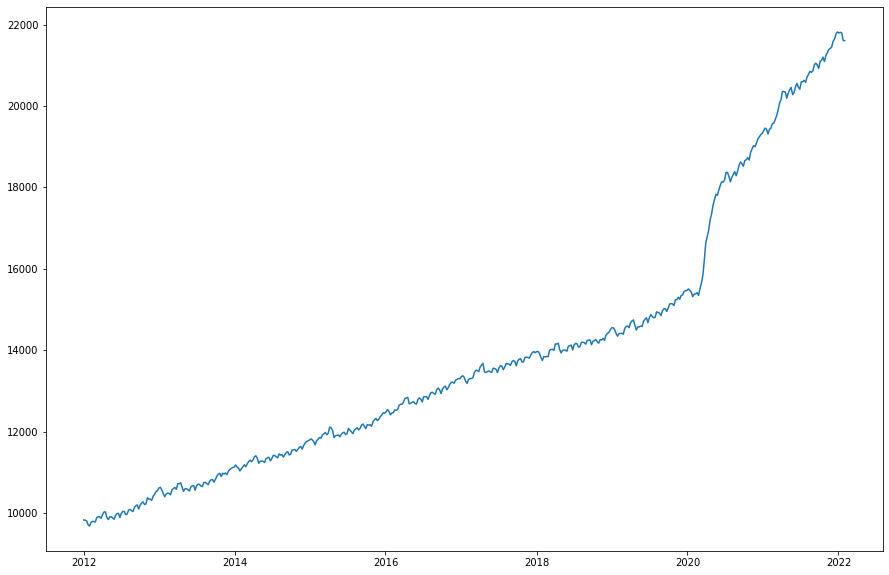

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(M2)

plt.show()

Clearly we have trend and then, after early 2020 "event", the trend shifted.  

Following common practice, we difference the series and take a look.

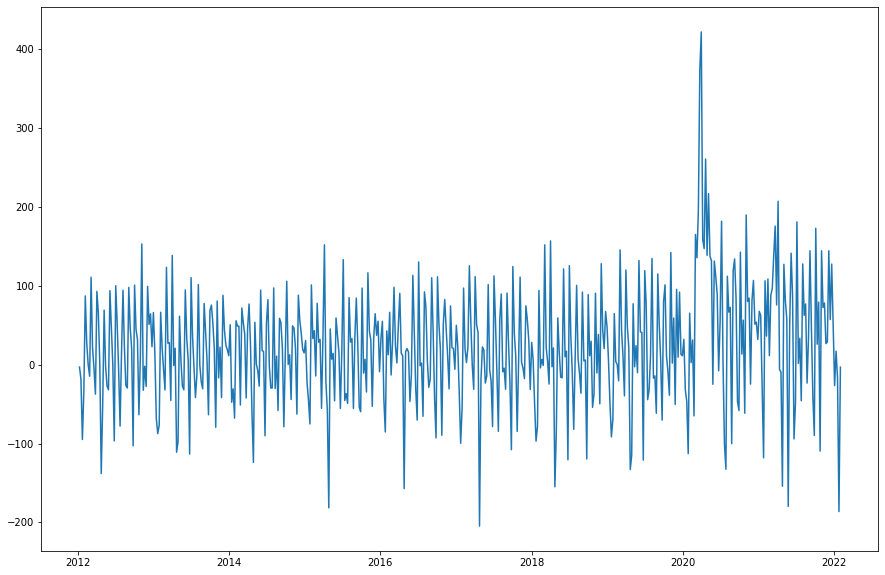

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(M2.diff())

plt.show()

This is closer to stationary. Though we might argue that the level shifted upward in early 2020.

Now, let's do same thing with the unemployment rate

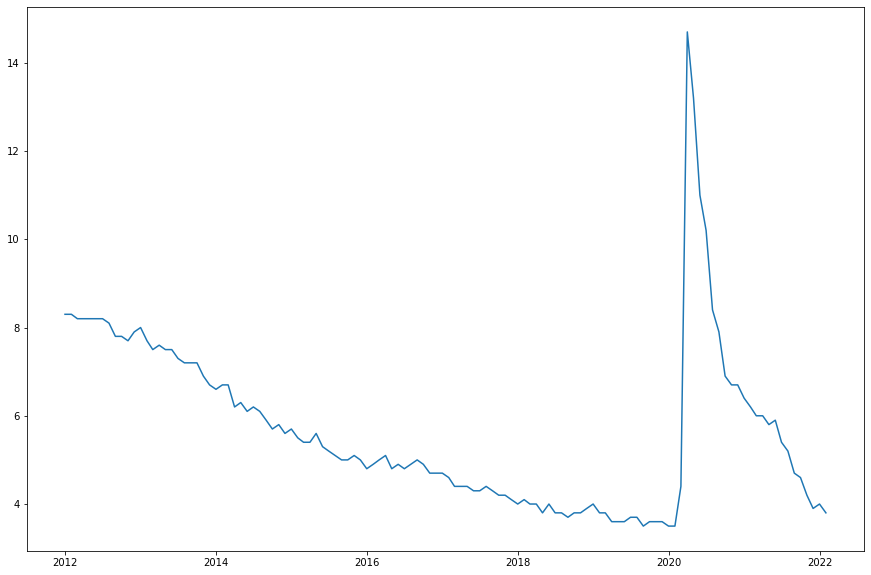

In [ ]:
unemp = edata.UNRATE.dropna()

plt.figure(figsize=(15,10))

plt.plot(unemp)

plt.show()


Similarly, we see a "trend".  So let's difference.

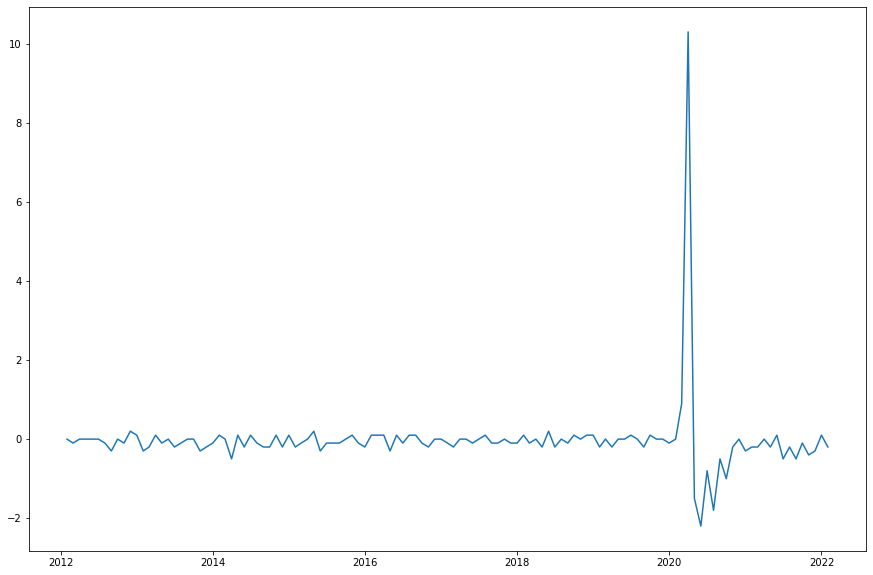

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(unemp.diff())

plt.show()

## What do we mean mathematically?

The concept of stationary for a time series means that if we look at some interval of time, statistically speaking, it looks the same as any other time.  We can state this formally as follows:

### Strongly Stationary


Let $\{X_i\}, i = 1,..., T$ be a series of random variables.  We will say that series is *strongly stationary* if
for any pair of integer $n,m >0$, the joint distributions of

$(X_1,X_2,...,X_n)$ and $(X_{1+m}, X_{2+m},..., X_{n+m})$ are identical. 


So, no matter the length of the interval ($n$) and no matter the shift ($m$), everything looks the same.

This is quite strong and would in general be very hard to demonstrate emprically.  As as noted above, stationarity doesn't always last (so to speak). 



### Weakly Stationary

A weaker definition that is suitable in most cases is weakly stationary.  Here, instead requiring that 

$(X_1,X_2,...,X_n)$ and $(X_{1+m}, X_{2+m},..., X_{n+m})$ be Identical, require that they are identical up to first and secoon moments.  That is, the mean vector are identical and the covariance matrices are identical (regardless of $m$ and $n$).   This can be shown to be equivalant to:


1. $\mathrm{E}(X_i) = \mu, \forall i$
2. $\mathrm{Var}(X_i) = \sigma^2, \forall i$
3. $\mathrm{Cov}(X_i,X_j) = \sigma^2 \rho(|i-j|)$ for some function $\rho(|i-j|)$


The function $\rho(|i-j|)$ is called the *autocorrelation function*





Cleary, a stronlgy stationary series is weakly stationary but not the other way around.  For the most part, we will be satisfied with weakly stationary series.  In fact, we wil  generally have to settle for "almost" weakly stationary.  

Why do we care?  If a series isn't weakly stationary, it can become mathematically untractable fairly quickly.




## Plotting the ACF.

It's important to be able to visualise the acf (as we will see later).  Of course, what we can actually plot is the sample autocorrelation.  If $h = |i-j|$, we estimate is as follows




$$\hat{\rho}(h) = \frac{\frac{1}{T-h}\sum_{i=1}^{T-h} (x_i - \bar{x})(x_{i+h}- \bar{x})}{s_X^2}$$


where

$$\bar{x} = \frac{1}{T}\sum_{i=1}^T x_i$$

and

$$s_X^2 = \frac{1}{T-1}\sum_{i=1}^T(x_i- \bar{x})^2$$



Unsurprisingly, this is "built in" with python (in a couple of ways).

Let do this for our previous time series for the change in unemployment.




In [ ]:
unempchange = unemp.diff().dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


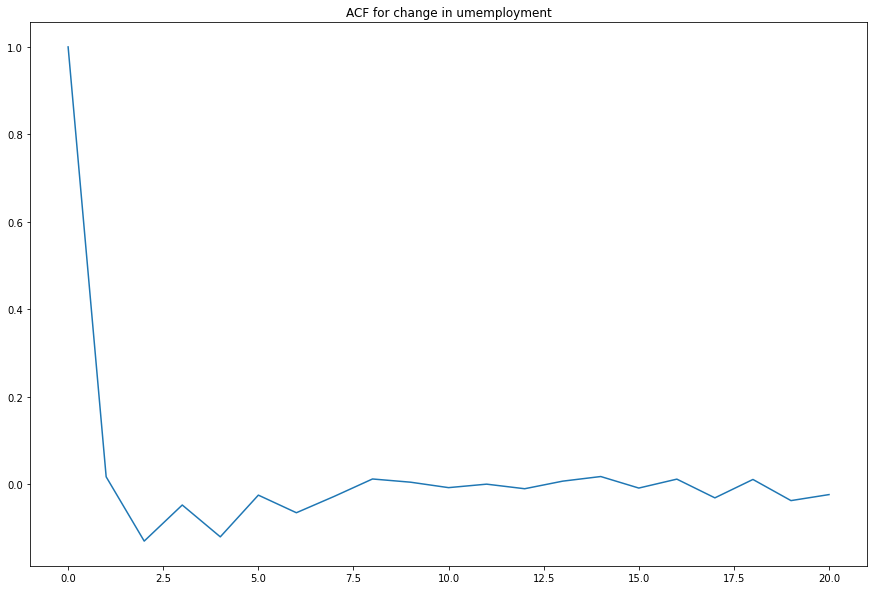

In [ ]:
from statsmodels.tsa import stattools


plt.figure(figsize = (15,10))

plt.plot(np.arange(21),stattools.acf(unempchange, nlags=20))

plt.title("ACF for change in umemployment")

plt.show()



Another way to get an acf plot is to use pandas.plotting. Notice that is gives every possible lag. 




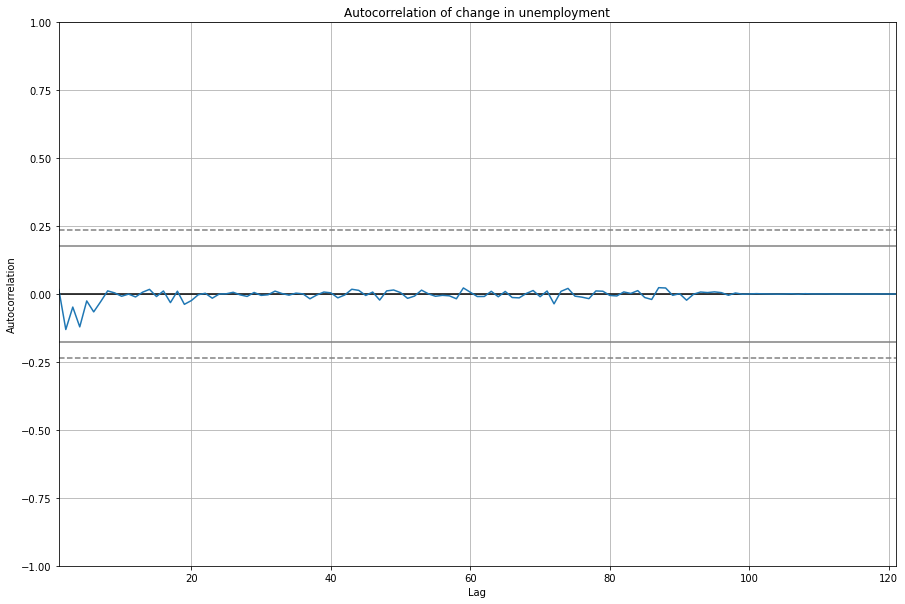

In [ ]:
plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(unempchange)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation of change in unemployment")
 
# Display
plt.show()

Sometimes, the ACF shows some kind of periodicity. Consider M2change

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


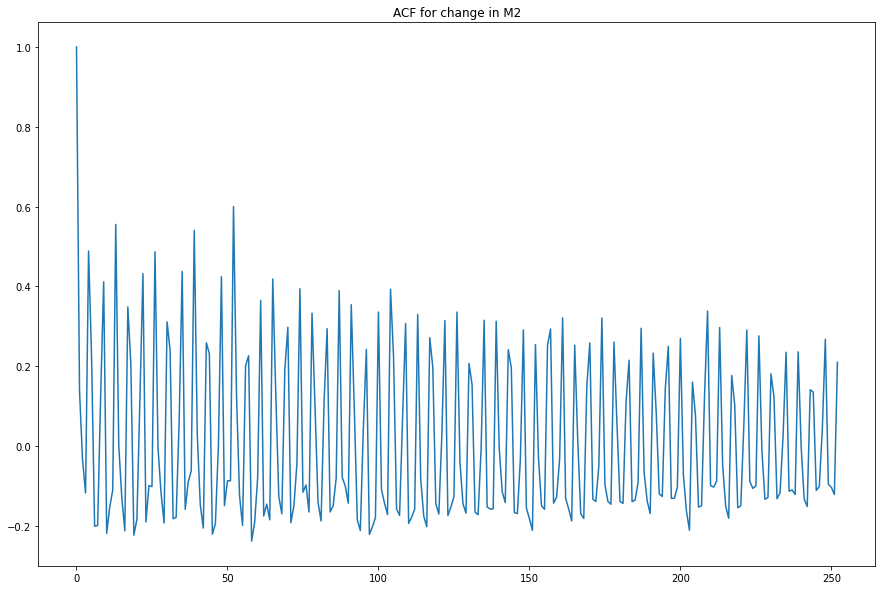

In [ ]:
M2change = M2.diff().dropna()



plt.figure(figsize = (15,10))

plt.plot(np.arange(253),stattools.acf(M2change, nlags=252))

plt.title("ACF for change in M2")

plt.show()



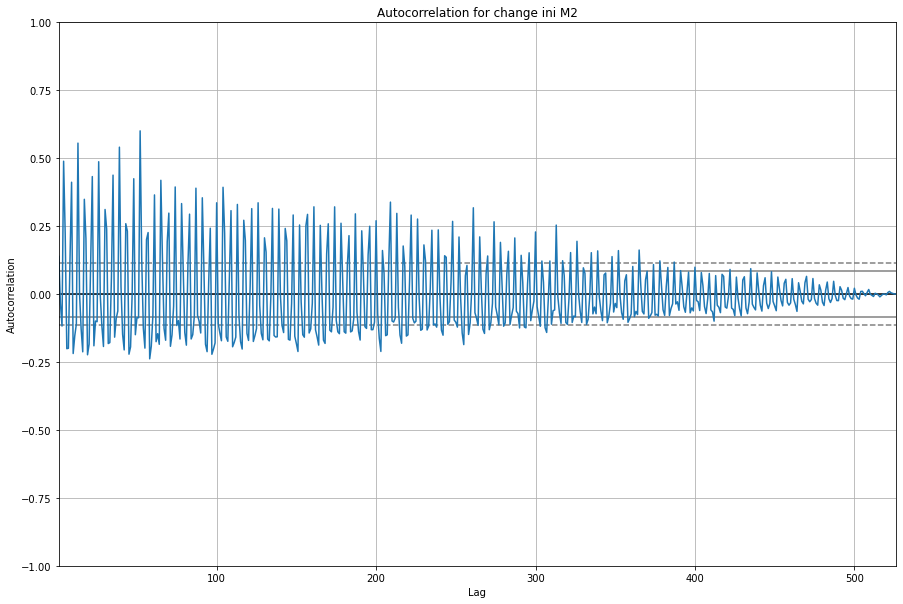

In [ ]:
plt.figure(figsize = (15,10))

x = pd.plotting.autocorrelation_plot(M2change)
 
# plotting the Curve
x.plot()

plt.title("Autocorrelation for change ini M2")
 
# Display
plt.show()

## Summary

* When working with time series, stationarity is an important property
* Differencing a series is one way to make a non-stationary series more stationary
* Strongly stationary seriess have identical joint distributions for a given length for all shifts.
* Weakly stationary series have the same mean, variance for every point and have an ACF.
* We can plot the ACF using Python.